In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [5]:
df = pd.read_csv("data/yellow_tripdata.csv")
df.sample(5)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
32838,2,1,20.53,2,1,132,140,1,70.0,0.5,6.94,1,11.00
38686,2,1,18.00,2,1,132,230,1,70.0,0.5,6.94,1,10.00
13429,2,1,17.86,2,1,132,249,1,70.0,0.5,6.94,1,13.00
28415,2,3,17.66,2,1,132,230,1,70.0,0.5,12.47,1,17.29
26876,2,4,17.76,5,1,132,48,1,87.0,0.0,6.94,1,19.49


<Axes: >

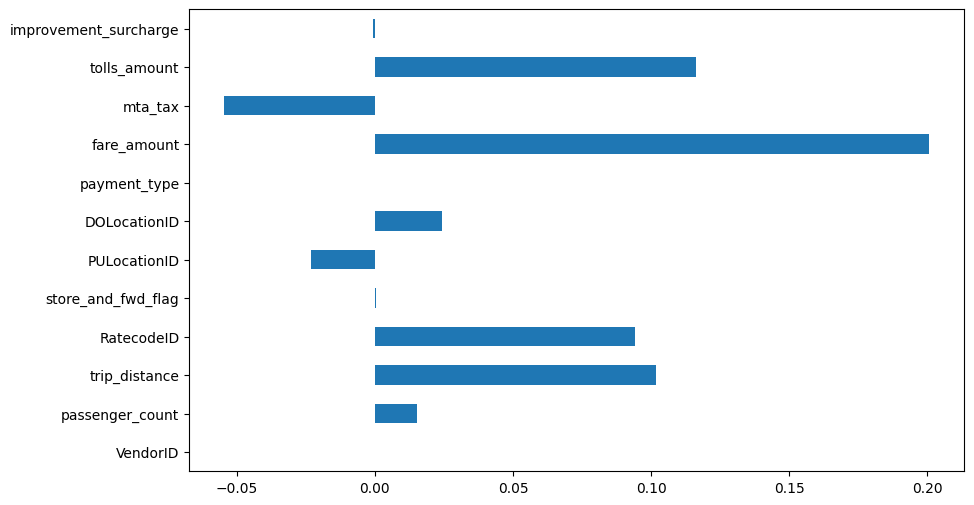

In [6]:
correlation_values = df.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [ ]:
# preprocessing

In [44]:

def preprocessing_pipeline(df):
    # drop the target variable from the feature matrix
    proc_data = df.drop(['tip_amount'], axis=1)

    # get the feature matrix used for training
    X = proc_data.values
    
    # normalize the feature matrix
    X = normalize(X, axis=1, norm='l1', copy=False)
    
    return X
    

In [45]:
X = preprocessing_pipeline(df)

# extract the labels from the dataframe
y = df[['tip_amount']].values.astype('float32')


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# model training

In [64]:

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=4, 
                               random_state=35)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=35)

In [49]:
# predictions max_depth 8

In [56]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE score : {0:.3f}'.format(rmse_score))

r2 = r2_score(y_test, y_pred)
print('R^2 score : {0:.3f}'.format(r2))

RMSE score : 4.955
R^2 score : 0.028


In [62]:
# predictions max_depth 4

In [65]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE score : {0:.3f}'.format(rmse_score))

r2 = r2_score(y_test, y_pred)
print('R^2 score : {0:.3f}'.format(r2))

RMSE score : 4.941
R^2 score : 0.034


In [ ]:
# reducing the depth of the tree improves the metrics (rmse, and r2), the error is reduced and the variance in predictions
# is better explained by the feature set

In [ ]:
# remove empty columns from correlation table

In [14]:
df_copy = df.drop(columns=["VendorID", "payment_type"])
df_copy

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,1,17.63,2,1,132,164,70.0,0.5,6.94,1,16.54
1,1,19.52,2,1,132,236,70.0,0.5,6.94,1,16.19
2,1,17.81,2,1,132,48,70.0,0.5,6.94,1,12.00
3,2,19.30,2,1,132,148,70.0,0.5,0.00,1,5.00
4,1,18.75,2,1,132,234,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...
41197,1,16.94,2,1,132,164,70.0,0.5,6.94,1,5.00
41198,4,19.83,2,1,132,166,70.0,0.5,6.94,1,8.00
41199,1,17.31,2,1,132,137,70.0,0.5,6.94,1,8.00
41200,1,17.28,2,1,132,233,70.0,0.5,6.94,1,16.19


In [15]:
#  Identify the top 3 features with the most effect on the tip_amount: fare_amount, tolls_amount, trip_distance

df_corr = df_copy.corr()
df_corr

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
passenger_count,1.000000,-0.004092,0.065441,-0.007627,-0.001270,0.000266,0.039041,-0.061276,0.045621,-0.012612,0.015081
trip_distance,-0.004092,1.000000,0.043416,0.001202,-0.076809,0.037901,0.430373,0.070344,0.116085,0.031708,0.101819
RatecodeID,0.065441,0.043416,1.000000,0.001357,-0.023547,0.034514,0.491720,-0.871507,0.020164,-0.031749,0.094075
store_and_fwd_flag,-0.007627,0.001202,0.001357,1.000000,0.000703,-0.003097,-0.000055,-0.003332,0.002761,-0.000121,0.000320
PULocationID,-0.001270,-0.076809,-0.023547,0.000703,1.000000,0.017738,-0.112935,0.002109,-0.015988,0.039675,-0.023086
DOLocationID,0.000266,0.037901,0.034514,-0.003097,0.017738,1.000000,0.036020,0.003866,0.055673,-0.004676,0.024348
fare_amount,0.039041,0.430373,0.491720,-0.000055,-0.112935,0.036020,1.000000,-0.364302,0.104411,-0.000011,0.200638
mta_tax,-0.061276,0.070344,-0.871507,-0.003332,0.002109,0.003866,-0.364302,1.000000,0.064604,0.036430,-0.054488
tolls_amount,0.045621,0.116085,0.020164,0.002761,-0.015988,0.055673,0.104411,0.064604,1.000000,0.009274,0.116172
improvement_surcharge,-0.012612,0.031708,-0.031749,-0.000121,0.039675,-0.004676,-0.000011,0.036430,0.009274,1.000000,-0.000727


<Axes: >

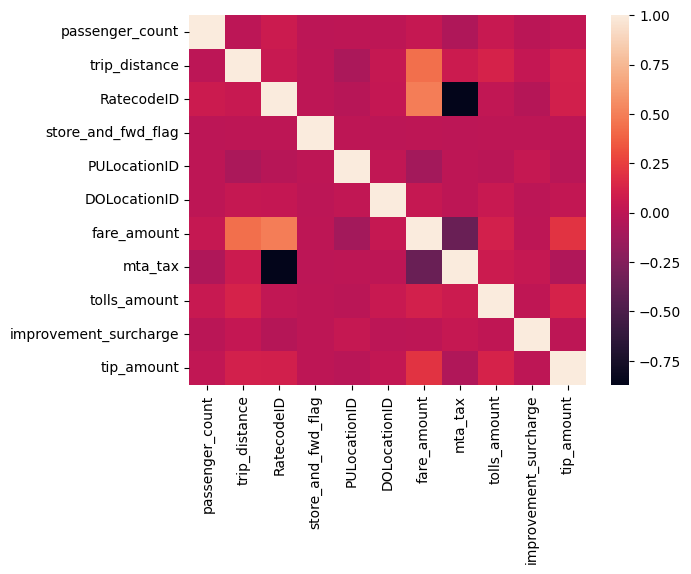

In [18]:
sns.heatmap(df_corr) 

In [19]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
       'tip_amount'],
      dtype='object')

In [ ]:
# 'RatecodeID', 'store_and_fwd_flag', 'store_and_fwd_flag', improvement_surcharge'

In [57]:
df_copy2 = df.drop(columns=['RatecodeID', 'store_and_fwd_flag', 'store_and_fwd_flag', 'improvement_surcharge'])

In [58]:
X = preprocessing_pipeline(df_copy2)

# extract the labels from the dataframe
y = df[['tip_amount']].values.astype('float32')


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=8, 
                               random_state=35)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

In [61]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE score : {0:.3f}'.format(rmse_score))

r2 = r2_score(y_test, y_pred)
print('R^2 score : {0:.3f}'.format(r2))

RMSE score : 4.974
R^2 score : 0.020


In [51]:
# by removing the features with low correlation from the feature set, the metrics (rmse, r2) performed worse
# as the variance explained by the model was reduced and the error was greater